In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv('movies.csv')

In [4]:
df1.shape

(9742, 3)

In [6]:
df_rating=pd.read_csv('ratings.csv')

In [7]:
df_rating.shape

(100836, 4)

In [11]:
"""find uniquie userid in dF_ ratings"""
unique_userid=df_rating['userId'].unique()
unique_userid.shape

(610,)

In [12]:
"""Which movie has recieved maximum number of user ratings?"""
df_rating.groupby('movieId').size().sort_values(ascending=False).head(1)


movieId
356    329
dtype: int64

In [13]:
#Which movie has recieved maximum number of user ratings?
df_rating.groupby('movieId').size().sort_values(ascending=False).head(1)

movieId
356    329
dtype: int64

In [14]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
df1[df1['title']=='Matrix, The (1999)']['genres']

1939    Action|Sci-Fi|Thriller
Name: genres, dtype: object

In [15]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
df_rating[df_rating['movieId']==2]['rating'].mean()

3.4318181818181817

<Axes: >

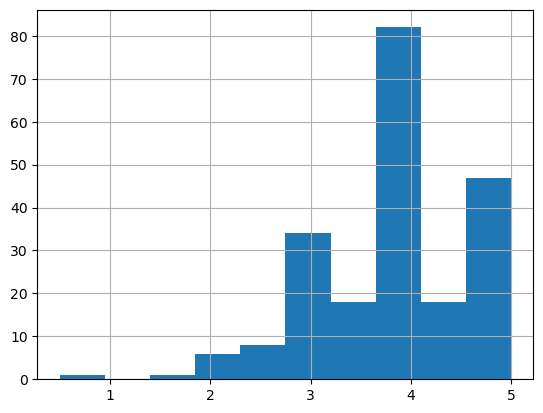

In [16]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?
df_rating[df_rating['movieId']==1]['rating'].hist()
# Normal Distribution
# Left Skewed Distribution
# Right Skewed Distribution
# Uniform Distribution


In [17]:
#Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
df_rating.groupby('movieId')['rating'].agg(['count','mean'])

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [18]:
#Apply inner join on dataframe created from movies.csv and the grouped df from above
df_movie_rating=df1.merge(df_rating.groupby('movieId')['rating'].agg(['count']),on='movieId')

In [19]:
#Filter only those movies which have more than 50 user ratings (i.e. > 50).
df_movie_rating[df_movie_rating['count']>50]

,movieId,title,genres,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
5,6,Heat (1995),Action|Crime|Thriller,102
6,7,Sabrina (1995),Comedy|Romance,54
...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59


In [26]:
#Which movie is the most popular based on  average user ratings?
df_movie_rating[df_movie_rating['count']>50].max()

movieId              122904
title      Zoolander (2001)
genres             Thriller
count                   329
dtype: object

In [28]:
"""Which movie is the most popular based on  average user ratings"""
df_movie_rating[df_movie_rating['count']>50].idxmax()

AttributeError: 'DataFrame' object has no attribute 'id'

In [29]:
"""Select all the correct options which comes under top 5 popular movies based on number of user ratings."""
df_movie_rating[df_movie_rating['count']>50].nlargest(5,['count'])

,movieId,title,genres,count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278


In [32]:
"""Which Sci-Fi movie is third most popula based on the number of user ratings?"""
df_movie_rating[(df_movie_rating['genres']=='Sci-Fi') & (df_movie_rating['count']>50)]

,movieId,title,genres,count


In [33]:
"""You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.
"""
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
import csv
import json
import os
import warnings
warnings.filterwarnings('ignore')


In [34]:
df_links= pd.read_csv('links.csv')

In [39]:
"""join df_link and df1"""
df_movie_rating= pd.merge(df_movie_rating,df_links,on='movieId')


In [40]:
"""count max imdb rating """
df_movie_rating[df_movie_rating['imdb_rating']>0].max()

KeyError: 'imdb_rating'

In [43]:
""" movieId of the movie which has the highest IMDB rating.
"""
df_movie_rating[df_movie_rating['imdbID']>0].count()

KeyError: 'imdbID'

In [44]:
"""scrape the IMDB reviews of each movie with more than 50 user ratings"""
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
"""scrape the IMDB reviews of each movie with more than 50 user ratings"""


In [45]:
df_movie_rating[(df_movie_rating['genres']=='Sci-Fi') & (df_movie_rating['count']>50)].tail()

,movieId,title,genres,count,imdbId,tmdbId
